# PSTAT 234/134 Final Project
## An Exploration of Modern Recommendation Techniques
### By Nicholas Roze-Freitas and Coby Wilcox 

## Introduction
Recommender systems, or recommenders, are found everywhere in our day-to-day lives; when we engage with social media, shop online, or look for something to watch on a streaming service, we interact with a recommender. Regardless of how ubiquitous recommenders are, building and evaluating recommender systems present interesting and unique challenges for a few reasons. Primarily, recommenders are built as a combination of several subsystems which requires careful orchestration of how the subsystems interact with each other and how data flows from end to end. Secondly, recommenders are evaluated on a large group of accuracy metrics ranging from the standard RMSE to more recommender-specific ones: serendipity, novelty, robustness, accuracy, and coverage to name a few. Through this project, we follow the recent history of innovation in recommender systems by implementing matrix factorization models, factorization machines, and TensorFlow recommender implementations. 

## Dataset Description
Released in 2019 by Microsoft, the Microsoft News Dataset, also known as MIND, is a large-scale dataset used to benchmark recommender systems for news as well as encourage research surrounding them. MIND is composed of four separate files, two of them containing relational embeddings generated by a knowledge graph, the other two being the catalog of articles and a set of user impressions. As this was our first foray into the field of recommenders, we avoided using the embeddings generated via knowledge graph and focused on the catalog and user behaviors. We used the training split of the dataset for our project in order to minimize computation time. Irrespective of it being the training split, it still contained over 73,000 items and 290,000 users. 

## Exploratory Data Analysis Findings
Our exploratory data analysis was performed with the intention to help us understand our data and determine potential features that could be used in our recommender systems. As previously mentioned we used the news and behaviors files which represented the catalog and impressions that we would be using to build our systems.
### News
Our analysis of news began with missing value analysis and an initial peek into the distribution of categories followed by an examination of usable features. When checking the missing values of news we noticed that article abstracts were the only missing information of importance. As this could lead to issues in item clustering and Tensorflow recommender systems we concatenated the articles' abstracts and titles together for clustering and dropped missing rows for Tensorflow modelling. The distributions of article categories are shown below, notably, the distribution is skewed with a majority of articles being of the news and sports categories.


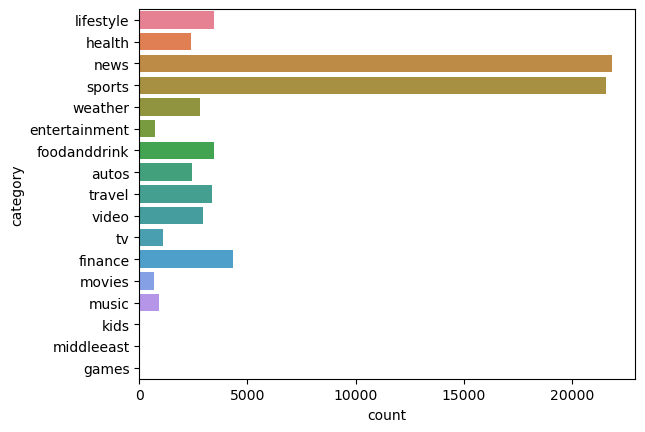

### Behaviors
Our analysis of behaviors followed similarly to that of news with the addition of exploring article popularity, category and subcategory popularity, and temporal popularity of categories. Notably present in our analysis of article popularity was a long tail, where only a few articles held a disproportionate amount of ratings as visible in (FIG 2). 

Generally in recommender systems, this is known as the ‘long tail problem’ where recommendations can be skewed as a result of popularity. The reason for this long tail within the context of the dataset is understandable given that specific articles generally receive more traction than others. 

<img src="https://github.com/jambory/135FinalProject/blob/main/images/cat_pop_count.jpg?raw=true" style="height:400px"/>

Regarding our temporal analysis, we found that the popularity of specific categories like lifstyle and news were more prevalent during the morning as visible below. 

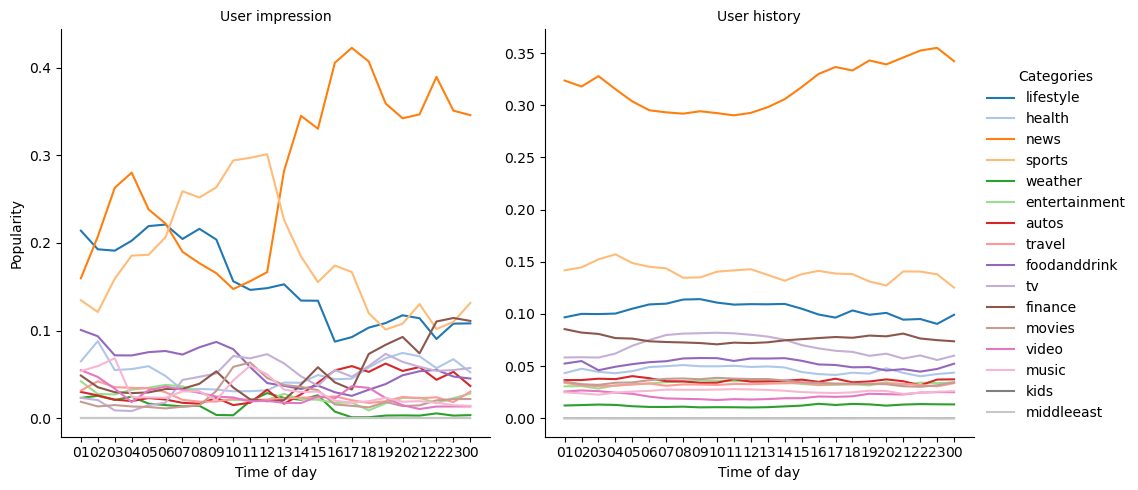


## Clustering: 
Clustering is utilized within many recommendation techniques employed within real-world systems for several key reasons. The computational challenge of managing potentially millions, if not billions, of items and users within a single model is significant. Through clustering, we were given an opportunity to reduce the magnitude of our data effectively minimizing compute times. Furthermore, the consolidation of users and items into clusters lends itself to either collaborative or content filtering recommendation approaches. Lastly, clustering afforded an additional advantage in making the range of observed values in our ratings matrix R more diverse; this is beneficial for matrix factorization techniques in comparison to otherwise binary values that exist in MIND.

Different clustering algorithms and means of dimension reduction were explored for both users and items with the goal of creating what we thought to be the best sets of clusters. A more detailed explanation of our exploration can be found in clustering_report.

### User Clusters Results
Dimension reduced user embeddings were created using UMAP determined via a Euclidean distance metric on regularized user features. These embeddings were then clustered with K-Means clustering and resulting groups exhibited clear and distinct boundaries despite certain outliers being observed. Primarily, these outliers comprised users who exclusively engaged with content from a single underrepresented subcategory; “newscrime" being one such niche category.

### Item Clustering Results
Similarly to user embeddings, item embeddings were created using UMAP determined via a Hellinger distance metric on concatenated titles and abstracts turned into tf-idf vectors. K-Means clustering was applied to similar affect, resulting in clear and distinct groupings. Below we include visualizations of our clusters.

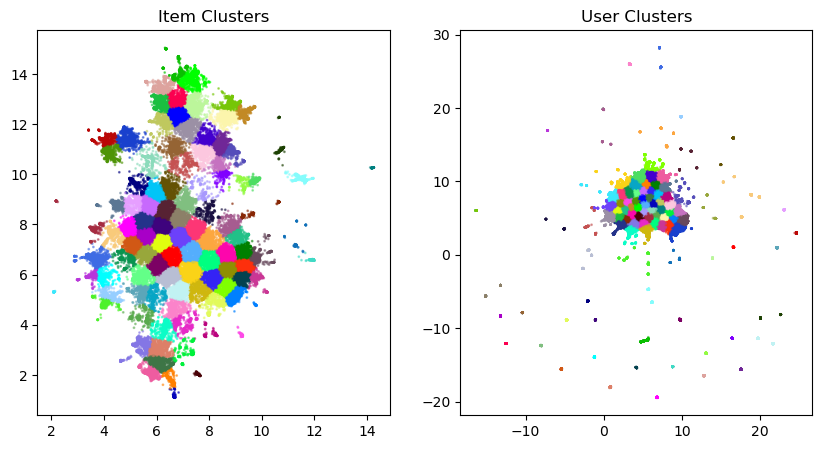

## Predicting Ratings
As a baseline for predicting ratings of items under both user and item clustering methods for a ratings matrix R, we implemented gradient descent and alternating least squares algorithms. Under matrix factorization for recommenders the goal is to minimize the following: $$\min_{U,V} \sum_{r_{ij} \text{observed}}{(r_{ij}-u_{i}^Tv_{j})^2} + \lambda(\sum_{i}\|u_i\|^2 + \sum_{j}\|v_j\|^2)$$ 

### Gradient Descent - Implementation
Our initial implementation of gradient descent iterated over user and item latent factor matrices $U$ and $V$ by vector. While feasible it was relatively inefficient causing us to optimize our update formulae through vectorized operations.

### Alternating Least Squares - Implementation
Our implementation of alternating least squares, ALS, was based on the implementation discussed in lecture 14 of CME 323: Distributed Algorithms and Optimization from Stanford. ALS minimizes the same loss function with a different approach to matrix factorization by fixing and updating $U$ and $V$ alternatingly.

### Matrix Factorization - Results
ALS and gradient descent were tested for different numbers of latent factors and amounts of regularization. Overall ALS performed very well typically converging after only a couple iterations. Gradient descent under item clustering also performed highly, however under user clustering we suspect that often times the algorithm would get caught in a non global minima. Below we show how ALS performed under each clustering type with differing levels of latent factors.  

To read more about these implementations, refer to model_report.

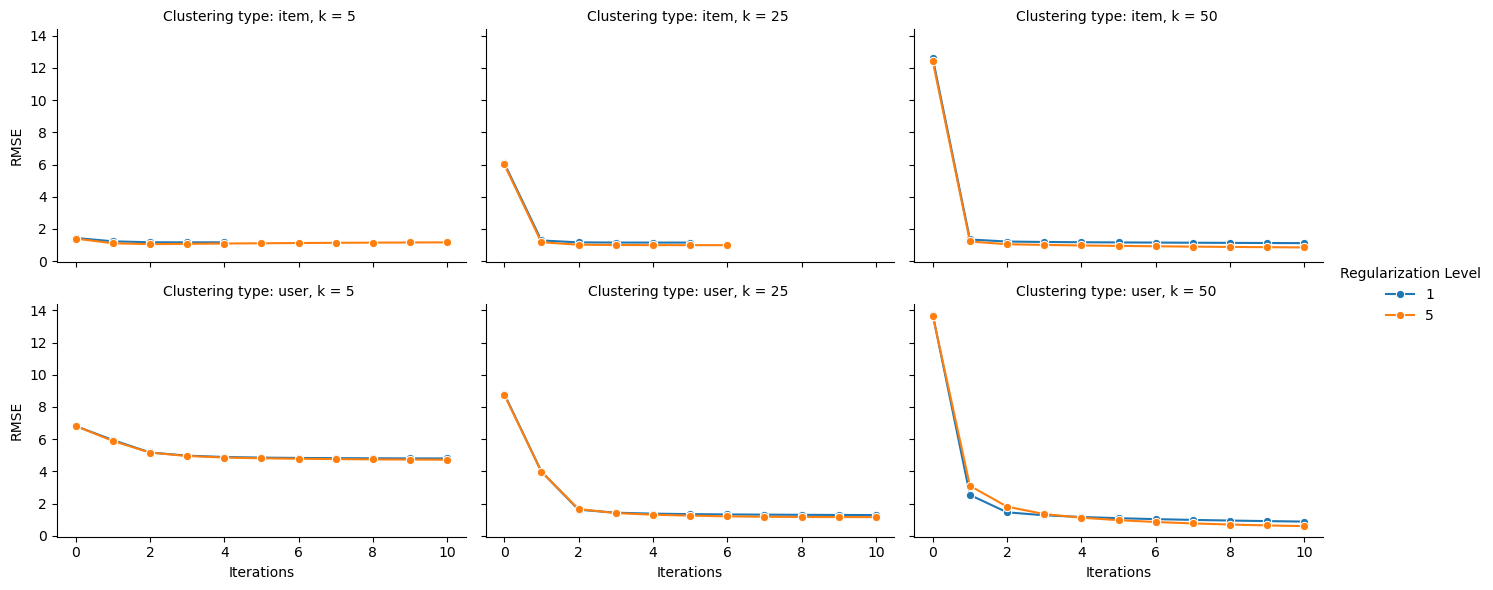

### Factorization Machines - Implementation
We breifly touched on factorization machines implementing one and testing out the affects that different amounts of features may have on overall model accuracy for rating prediction.   

## Making recommendations
For methods like gradient descent and alternating least squares, we were able to fully predict a ratings matrix R. However in recommenders this is only half the battle as the predicted ratings still must be ranked. The most simple method of making recommendations was simply to look at each user's predicted ratings and recommend the top N scores. Recommendations made this way are lackluster as they do not utilize a user's features nor further any potential business goals. Improving on this we introduced hybrid filtering techniques as well as a weighting system determined by user and item features. In order to influence ratings in the direction of specific business goals, weights were adjusted in favor of certain categories. An example of this can be seen below, where we show the distribution of categories for recommendations given to 500 users before and after adding a positive weight to the finance category. More details on how we introduced filtering techniques and calculated weights can be found in model_report. 

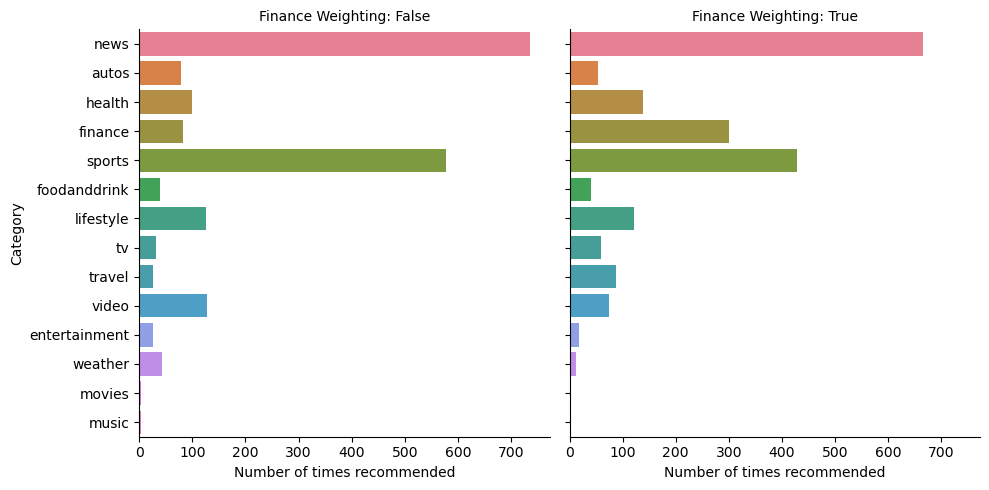

## Example Recommendation Flow:
Below we include an abridged version of the data flow leading up to a recommendation being made.

<img src="https://github.com/jambory/135FinalProject/blob/main/images/abridged.png?raw=true" style="height:500px"/>


## TensorFlow Implementation

To cap off our project we decided to create a recommender using Tensorflow. After working with slightly less sophisticated models for a majority of the project, Tensorflow felt different to anything we had worked on prior. It allowed a good peek into what more modern frameworks offer regarding machine learning modeling. Fitting our dataset to work within the Tensorflow system did take some work and unfortunately due to a bug in the framework we were only able to implement the rating portion of a recommender. Regardless, after model training predicted ratings achieved impressive accuracy metrics. Moving forward we would like to experiment more with Tensorflow not only in the context of recommmenders but in machine learning as a whole.

## Future Improvements
Moving forward we would like to include better edge case handling for our recommendation step, explore accuracy metrics more thoroughly, work more on Tensorflow modeling capabilities, and improve pipeline efficiency. 

## What We Learned
Regarding overall learning outcomes, this project provided an opportunity to work on implementing and evaluating a full offline recommender system pipeline from start to finish. Navigating a large dataset both in terms of features and size proved to be an excellent learning experience as it pushed us into unfamiliar territories and allowed us to apply all that we had learned thus far. We had to get our hands dirty and learn new technologies that we previously believed to be inaccessible: virtual machines, containers, GitHub and Git large file storage. We were introduced and given the free range to learn new techniques like dimension reduction and clustering through UMAP as well as using Numpy to implement matrix operations. Lastly, we were given an opportunity to improve on our research and academic skill set with an emphasis on reproducibility and clarity through proper documentation. We would like to extend a final thank you to Professor Oh, for supporting us and giving us the opportunity to work on something impactful for both of us and our futures.